## **Import Libraries** <a class="anchor" id="1"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

## **Task1: Load the images in appropriate data structures in your program, ready to be passed as input to the model for training. Consider input image size to be 224x224x3. [2 points]** <a class="anchor" id="Task1"></a>

In [2]:
training_files_path = 'Sports_Dataset\\archive\\train'
testing_files_path = 'Sports_Dataset\\archive\\test'
validation_files_path = 'Sports_Dataset\\archive\\valid'

In [3]:
training_data = ImageDataGenerator().flow_from_directory(training_files_path, target_size = (224,224), color_mode='rgb', class_mode = 'categorical')
testing_data = ImageDataGenerator().flow_from_directory(testing_files_path, target_size = (224,224), color_mode='rgb', class_mode = 'categorical')
validation_data = ImageDataGenerator().flow_from_directory(validation_files_path, target_size = (224,224), color_mode='rgb', class_mode = 'categorical')

Found 10416 images belonging to 73 classes.
Found 365 images belonging to 73 classes.
Found 365 images belonging to 73 classes.


## **Task2: Configure the CNN model (use keras tensorflow), an indicative (minimal) configuration is as below. Take activation function (A)=relu. Feel free to use standard values for anything that is not mentioned (eg, take pool size 2x2, filter size 3x3, and so on). [3 points]** <a class="anchor" id="Task2"></a>

In [4]:
#Initialising the CNN
model = keras.Sequential([
    # conv --> A --> pool
    layers.Convolution2D(4, (3,3), input_shape=(224,224,3), padding='same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2)), 
    
    # (conv --> A) --> (conv --> A) --> pool
    layers.Convolution2D(2, (3,3), padding='same', activation = 'relu'),
    layers.Convolution2D(2, (3,3), padding='same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2)),
    
    # full connected layer --> A
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    
    # Softmax classifier
    layers.Dense(training_data.num_classes, activation = 'softmax'),
])

# Compiling the CNN
model.compile(
    optimizer='adam', 
    metrics='accuracy',
    loss='categorical_crossentropy',
)

In [5]:
# display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 4)       112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 4)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 2)       74        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 2)       38        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 2)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               8

## **Task3: Train the CNN model for E epoch (take E=50), save the train_loss, train_acc, validation_loss, validation_acc for each epoch and plot it after training has finished. [3 points]** <a class="anchor" id="Task3"></a>

In [6]:
EPOCHS = 50

In [7]:
es  = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)
ckpt= ModelCheckpoint("default_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [8]:
history = model.fit(
    training_data,
    validation_data=validation_data,
    epochs=EPOCHS,
    callbacks =[es, ckpt],
)

Epoch 1/50
326/326 [==============================] - 86s 263ms/step - loss: 4.4639 - accuracy: 0.0341 - val_loss: 4.1998 - val_accuracy: 0.0384

Epoch 00001: val_accuracy improved from -inf to 0.03836, saving model to default_model.h5
Epoch 2/50
326/326 [==============================] - 99s 303ms/step - loss: 3.9227 - accuracy: 0.0775 - val_loss: 4.0244 - val_accuracy: 0.0767

Epoch 00002: val_accuracy improved from 0.03836 to 0.07671, saving model to default_model.h5
Epoch 3/50
326/326 [==============================] - 81s 249ms/step - loss: 3.4912 - accuracy: 0.1430 - val_loss: 3.9349 - val_accuracy: 0.0986

Epoch 00003: val_accuracy improved from 0.07671 to 0.09863, saving model to default_model.h5
Epoch 4/50
326/326 [==============================] - 78s 238ms/step - loss: 2.9364 - accuracy: 0.2461 - val_loss: 4.1447 - val_accuracy: 0.0959

Epoch 00004: val_accuracy did not improve from 0.09863
Epoch 5/50
326/326 [==============================] - 78s 240ms/step - loss: 2.3337 -

In [9]:
model = load_model("default_model.h5")

In [10]:
# save the history of train_loss, train_acc, validation_loss, validation_acc for epochs
training_loss=history.history['loss']
training_accuracy=history.history['accuracy']
validation_loss=history.history['val_loss']
validation_accuracy=history.history['val_accuracy']

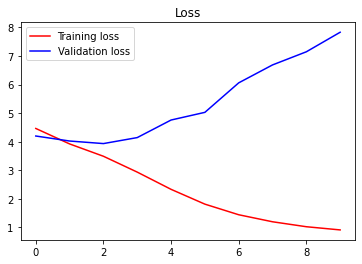

In [11]:
# plot the history of train_loss, validation_loss across epochs
plt.title("Loss")
plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.legend()
plt.show()

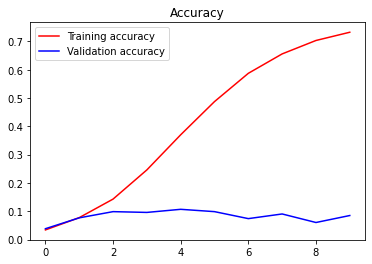

In [12]:
# plot the history of train_accuracy, validation_accuracy across epochs
plt.title("Accuracy")
plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.legend()
plt.show()

## **Task4: Evaluate the trained CNN model on test data. Print classification results. [1 point]** <a class="anchor" id="Task4"></a>

In [13]:
# evaluate the trained model and predict using the model
result = model.evaluate(testing_data, verbose=0)

print("Test Loss: {:.2f}".format(result[0]))
print("Test Accuracy: {:.2f}%".format(result[1] * 100))

Test Loss: 4.41
Test Accuracy: 9.59%


In [14]:
# decode the predicted labels

labels = (testing_data.class_indices)
labels = dict((v,k) for k,v in labels.items())

y_pred=[]
for i in range (testing_data.n):
    test_image = image.load_img(testing_data.filepaths[i], target_size = (224, 224))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    predicted = model.predict(test_image)
    predicted = np.argmax(predicted, axis = 1)
    y_pred.append(predicted[0])

y_test = testing_data.labels

In [15]:
# print the classification report for the default model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         5
           7       0.08      0.20      0.11         5
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         5
          12       0.25      0.60      0.35         5
          13       0.27      0.60      0.37         5
          14       0.25      0.40      0.31         5
          15       0.20      0.20      0.20         5
          16       0.25      0.20      0.22         5
          17       0.25    

In [16]:
# store the precision and recall obtained with this default model
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

## **Task5: Can you try to make changes in anyway in the CNN model and improve your test accuracy? Let's call the model constructed as per step-2 above as 'default' and the improvement as 'improved' model. Plot precision and recall for default and improved model in a single bar plot. [3 points]** <a class="anchor" id="Task5"></a>

In [17]:
es  = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)
ckpt= ModelCheckpoint("improved_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [18]:
# lets transfer learning from VGG16 model 
base_model = keras.applications.VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

# Top Model Block
x = base_model.output
x = layers.Flatten()(x)
predictions = Dense(training_data.num_classes, activation='softmax')(x)

# add top layer block to base model
improved_model = Model(base_model.input, predictions)

# skip re-training base layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model
improved_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
# display model summary
improved_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [20]:
improved_history = improved_model.fit(
    training_data,
    validation_data=validation_data,
    epochs=EPOCHS,
    callbacks =[es, ckpt],
)

Epoch 1/50
326/326 [==============================] - 985s 3s/step - loss: 24.7016 - accuracy: 0.6029 - val_loss: 14.1384 - val_accuracy: 0.7973

Epoch 00001: val_accuracy improved from -inf to 0.79726, saving model to improved_model.h5
Epoch 2/50
326/326 [==============================] - 964s 3s/step - loss: 4.2909 - accuracy: 0.9230 - val_loss: 13.5021 - val_accuracy: 0.8219

Epoch 00002: val_accuracy improved from 0.79726 to 0.82192, saving model to improved_model.h5
Epoch 3/50
326/326 [==============================] - 986s 3s/step - loss: 2.1237 - accuracy: 0.9589 - val_loss: 14.8459 - val_accuracy: 0.8411

Epoch 00003: val_accuracy improved from 0.82192 to 0.84110, saving model to improved_model.h5
Epoch 4/50
326/326 [==============================] - 1053s 3s/step - loss: 1.8020 - accuracy: 0.9691 - val_loss: 14.2012 - val_accuracy: 0.8521

Epoch 00004: val_accuracy improved from 0.84110 to 0.85205, saving model to improved_model.h5
Epoch 5/50
326/326 [=========================

In [21]:
improved_model = load_model("improved_model.h5")

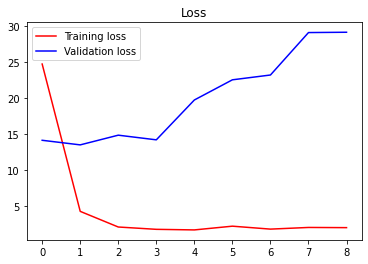

In [22]:
# plot the history of train_loss, validation_loss across epochs
plt.title("Loss")
plt.plot(improved_history.history['loss'], 'r', label='Training loss')
plt.plot(improved_history.history['val_loss'], 'b', label='Validation loss')
plt.legend()
plt.show()

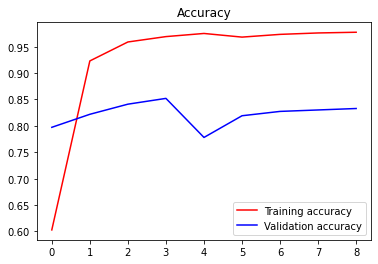

In [23]:
# plot the history of train_accuracy, validation_accuracy across epochs
plt.title("Accuracy")
plt.plot(improved_history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(improved_history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.legend()
plt.show()

In [24]:
# evaluate the trained model and predict using the model
result = improved_model.evaluate(testing_data, verbose=0)

print("Test Loss: {:.2f}".format(result[0]))
print("Test Accuracy: {:.2f}%".format(result[1] * 100))

Test Loss: 12.00
Test Accuracy: 85.21%


In [25]:
# decode the predicted labels

labels = (testing_data.class_indices)
labels = dict((v,k) for k,v in labels.items())

y_pred=[]
for i in range (testing_data.n):
    test_image = image.load_img(testing_data.filepaths[i], target_size = (224, 224))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    predicted = improved_model.predict(test_image)
    predicted = np.argmax(predicted, axis = 1)
    y_pred.append(predicted[0])

y_test = testing_data.labels

In [26]:
# print the classification report for the improved model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      0.60      0.75         5
           5       1.00      1.00      1.00         5
           6       0.50      0.40      0.44         5
           7       0.62      1.00      0.77         5
           8       1.00      1.00      1.00         5
           9       1.00      0.60      0.75         5
          10       0.62      1.00      0.77         5
          11       1.00      0.60      0.75         5
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5
          16       0.83      1.00      0.91         5
          17       1.00    

In [27]:
# store the precision and recall obtained with this improved model
improved_precision, improved_recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

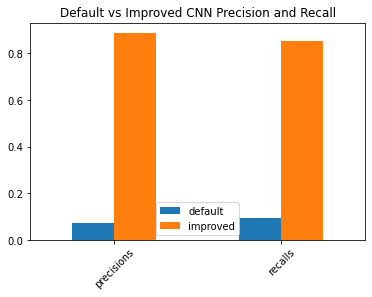

In [28]:
# compare the precision and recall parameters obtained in the default and the improved models
data = {"default":[precision, recall], "improved":[improved_precision, improved_recall]}
df = pd.DataFrame(data=data, index=["precisions", "recalls"]);
df.plot.bar(rot=45, title="Default vs Improved CNN Precision and Recall");
plt.show();

In [29]:
# clearly the improved model (using transfer learning) outperforms the default model! 